In [2]:
# Import packages and use shorthand (data, plt, pd)

import pandas as pd                   # data analysis library
import matplotlib.pyplot as plt       # data visualization library
import seaborn as sns                 # enhanced data visualization library
import numpy as np                    # numerical computational library
import datetime as dt                 # date & time manipulation library


from pandas_datareader import data    # remote data access for Pandas
from random import choice             # randomly select an item from a list of items

In [3]:
# Downloading packages
import sys                  # To install packages from your Jupyter Notebook


In [4]:
# Define function to get your Yahoo Finance data
def MR_get(tickers, start_date, end_date):
    adj_close = data.DataReader(tickers, 
                                data_source = 'yahoo', 
                                start       = start_date, 
                                end         = end_date)['Adj Close']
    
    return adj_close

## Monte Carlo Simulations

### Portfolio Formation

In [5]:
# Stock Tickers & Weights

# Stock tickers
tickers = ['PRGO', 'CNC', 'CVS', 'CI', 'UHS', 'TAP', 'SJM', 'ADM', 'TSN', 'COTY', 'PVH', 'CCL', 'MHK', 'F', 'KSS', 'XRX', 'NLOK', 'FIS', 'DXC', 'WDC', 'MRO', 'HFC', 'NOV', 'FANG', 'KMI']

# Need some weights for where we have our money
weights = pd.Series(index = tickers, dtype = float)   # list to hold our weights
weights[tickers] = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]                  # specific weights per ticker
#weights[tickers] = 1/len(tickers)                     # equal weights per ticker

# Check our list of stock tickers & weights
weights

PRGO    0.04
CNC     0.04
CVS     0.04
CI      0.04
UHS     0.04
TAP     0.04
SJM     0.04
ADM     0.04
TSN     0.04
COTY    0.04
PVH     0.04
CCL     0.04
MHK     0.04
F       0.04
KSS     0.04
XRX     0.04
NLOK    0.04
FIS     0.04
DXC     0.04
WDC     0.04
MRO     0.04
HFC     0.04
NOV     0.04
FANG    0.04
KMI     0.04
dtype: float64

In [6]:
# Quick recap on indexing
#weights[0]
#weights['F']

#weights[1]
#weights['AAPL']

#weights[2]
#weights['GOOG']

In [7]:
# Lookback Period, Returns, Mu, & Sigma

# Lookback period
start_date = '2015-01-01'           # start day for lookback
end_date   = '2020-12-31'           # end day for lookback                            
#end_date   = dt.datetime.today()   # automatically get today's date

# Pull Adj Close data
adj_close = MR_get(tickers, start_date, end_date)

# Compute Returns from the Adj Close
returns = adj_close[tickers].pct_change()
    
# Remove the NA from returns; we always get 1 fewer returns than data
returns = returns.dropna()

# Calculate mu (Expected Returns) and sigma (Volatility) of stocks
mu    = returns.mean() 
sigma = returns.std()  

In [8]:
# Check Portfolio
returns

Symbols,PRGO,CNC,CVS,CI,UHS,TAP,SJM,ADM,TSN,COTY,...,XRX,NLOK,FIS,DXC,WDC,MRO,HFC,NOV,FANG,KMI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.010322,-0.002681,-0.009884,-0.017213,-0.020456,-0.006093,-0.016322,-0.034602,-0.023029,-0.002937,...,-0.021818,-0.014068,-0.017305,-0.020237,-0.013221,-0.046503,-0.043184,-0.045656,-0.044218,-0.027096
2015-01-06,-0.001880,0.003264,0.000743,0.003958,0.000368,-0.004768,-0.007993,-0.019714,0.005893,-0.007364,...,-0.013383,-0.015458,-0.001304,0.002582,-0.022300,-0.015035,-0.011691,-0.012320,0.001571,-0.019688
2015-01-07,0.016707,0.005455,0.018041,0.023458,0.029888,0.032028,0.022335,0.015032,0.012226,0.003462,...,0.012811,0.009259,0.016490,0.007243,0.015018,0.012286,-0.021183,0.000972,0.015339,0.013225
2015-01-08,0.022826,0.015418,0.021266,0.050944,0.010269,0.030902,0.014466,-0.014609,0.036739,0.008378,...,0.027530,0.018349,0.014134,0.011345,0.020714,0.020228,0.031197,0.029778,0.048755,0.023447
2015-01-09,-0.008296,-0.007686,-0.000510,-0.010355,-0.002563,-0.001930,-0.006392,-0.008530,-0.020631,-0.029325,...,-0.005793,-0.006659,-0.003326,0.015800,0.016670,-0.003244,-0.026710,-0.027503,0.012277,-0.012518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.008016,-0.011247,-0.000588,-0.000754,-0.000949,0.001763,0.007988,0.001824,0.003718,-0.031039,...,-0.008780,0.003817,0.045134,0.000437,-0.000200,-0.026432,-0.003929,-0.009538,0.009414,0.000000
2020-12-28,0.014542,0.013961,0.001618,0.016748,-0.002921,0.000220,0.002067,0.005259,-0.006328,-0.018106,...,0.031001,-0.000951,-0.003622,0.050655,0.002805,0.000000,-0.005128,0.004444,-0.012850,-0.013738
2020-12-29,-0.002240,0.003400,-0.002644,0.009349,-0.002564,0.001319,-0.008596,-0.005030,-0.013669,-0.026950,...,-0.015893,-0.009039,0.007200,-0.016625,-0.035358,-0.009050,0.001983,-0.005900,-0.013227,-0.005132


In [9]:
# Check Expected Returns (𝜇)
mu

Symbols
PRGO   -0.000523
CNC     0.000832
CVS     0.000026
CI      0.000673
UHS     0.000411
TAP    -0.000067
SJM     0.000310
ADM     0.000237
TSN     0.000569
COTY    0.000050
PVH     0.000245
CCL     0.000211
MHK     0.000263
F       0.000039
KSS     0.000477
XRX     0.000249
NLOK    0.000668
FIS     0.000726
DXC     0.000663
WDC     0.000101
MRO    -0.000203
HFC     0.000322
NOV    -0.000499
FANG    0.000497
KMI    -0.000325
dtype: float64

In [10]:
# Check Volatility (𝜎)
sigma

Symbols
PRGO    0.024435
CNC     0.023582
CVS     0.017046
CI      0.020231
UHS     0.022606
TAP     0.018595
SJM     0.014909
ADM     0.016488
TSN     0.019285
COTY    0.036459
PVH     0.029650
CCL     0.034228
MHK     0.025137
F       0.020189
KSS     0.033569
XRX     0.025432
NLOK    0.020829
FIS     0.016268
DXC     0.033119
WDC     0.029545
MRO     0.036595
HFC     0.029897
NOV     0.030872
FANG    0.034179
KMI     0.022407
dtype: float64

In [11]:
# Initialize Monte Carlo parameters
monte_carlo_runs = 1000
days_to_simulate = 5
loss_cutoff      = 0.95 # count any losses larger than 5% (or -5%)


### 1) Parametric Simulation

In [12]:
# Parametric

compound_returns  = sigma.copy()
total_simulations = 0
bad_simulations   = 0

for run_counter in range(0,monte_carlo_runs):   # Loop over runs    
    for i in tickers:                      # loop over tickers, below is done once per ticker
        
        # Loop over simulated days:
        compounded_temp = 1
        
        for simulated_day_counter in range(0,days_to_simulate): # loop over days
            
            # Draw from 𝑁~(𝜇,𝜎)
            ######################################################
            simulated_return = np.random.normal(mu[i],sigma[i],1)
            ######################################################
            
            compounded_temp = compounded_temp * (simulated_return + 1)        
        
        compound_returns[i] = compounded_temp     # store compounded returns
    
    # Now see if those returns are bad by combining with weights
    portfolio_return = compound_returns.dot(weights) # dot product
    
    if(portfolio_return < loss_cutoff):
        bad_simulations = bad_simulations + 1
    
    total_simulations = total_simulations + 1

print("Your portfolio will lose", round((1-loss_cutoff)*100,3), "%",
      "over", days_to_simulate, "days", 
      bad_simulations/total_simulations, "of the time.")

Your portfolio will lose 5.0 % over 5 days 0.0 of the time.


### 2) Bootstrap Simulation

In [13]:
# Bootstrap

compound_returns  = sigma.copy()
total_simulations = 0
bad_simulations   = 0

for run_counter in range(0,monte_carlo_runs):   # Loop over runs    
    for i in tickers:                           # loop over tickers, below is done once per ticker
        
        # Loop over simulated days:
        compounded_temp = 1
        
        for simulated_day_counter in range(0,days_to_simulate): # loop over days
            
            # Draw from historical returns
            ####################################
            simulated_return = choice(returns[i])
            ####################################
            
            compounded_temp = compounded_temp * (simulated_return + 1)        
        
        compound_returns[i] = compounded_temp     # store compounded returns
    
    # Now see if those returns are bad by combining with weights
    portfolio_return = compound_returns.dot(weights) # dot product
    
    if(portfolio_return < loss_cutoff):
        bad_simulations = bad_simulations + 1
    
    total_simulations = total_simulations + 1

print("Your portfolio will lose", round((1-loss_cutoff)*100,3), "%",
      "over", days_to_simulate, "days", 
      bad_simulations/total_simulations, "of the time.")

Your portfolio will lose 5.0 % over 5 days 0.0 of the time.


## Graphic VaR

In [1]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns=['PRGO'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of Perrigo Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

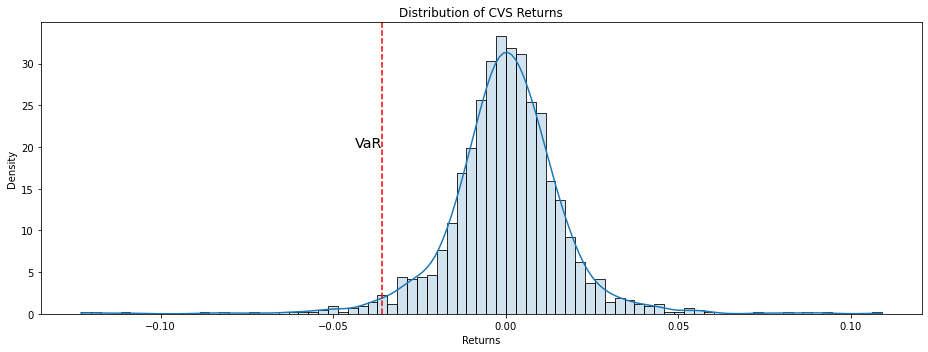

In [15]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['CVS'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of CVS Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

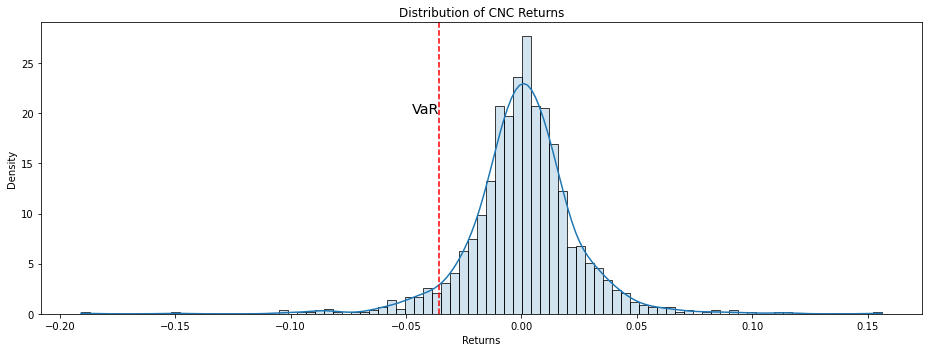

In [16]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['CNC'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of CNC Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

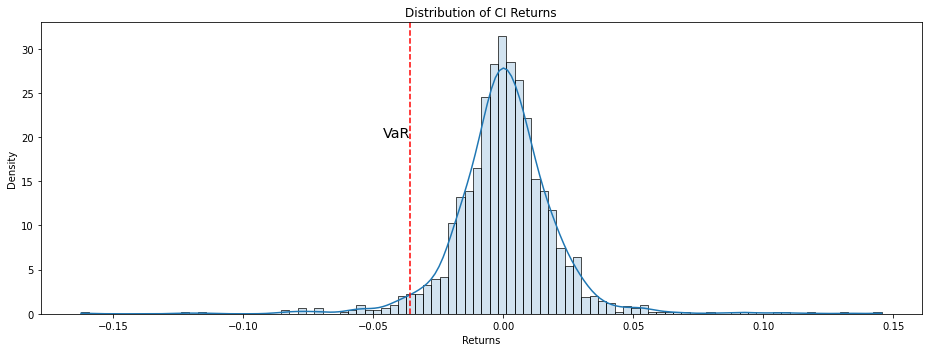

In [17]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['CI'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of CI Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

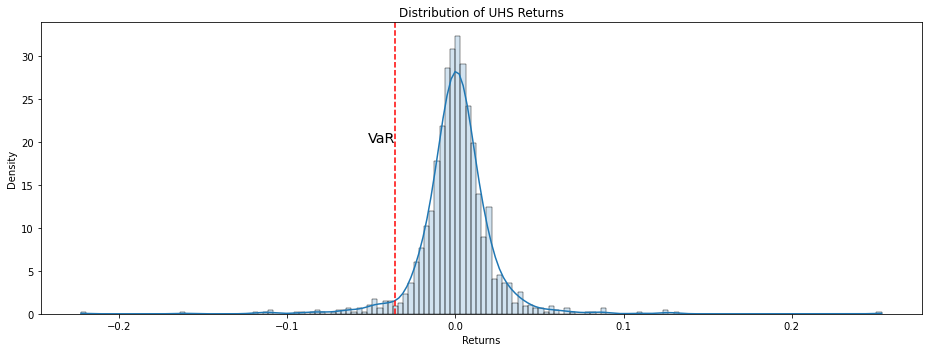

In [18]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['UHS'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of UHS Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

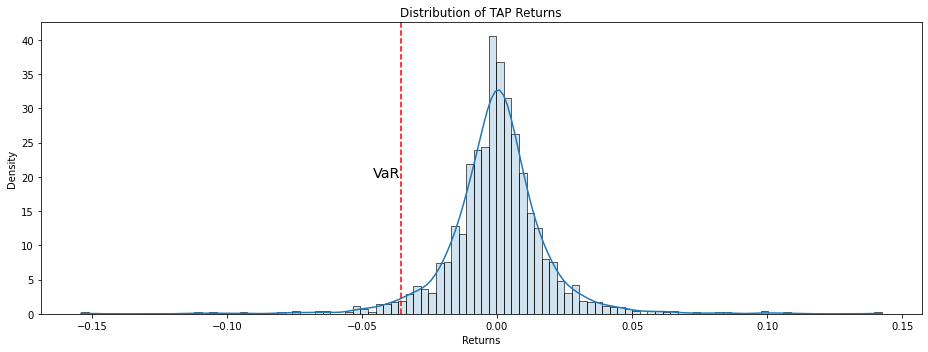

In [19]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['TAP'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of TAP Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

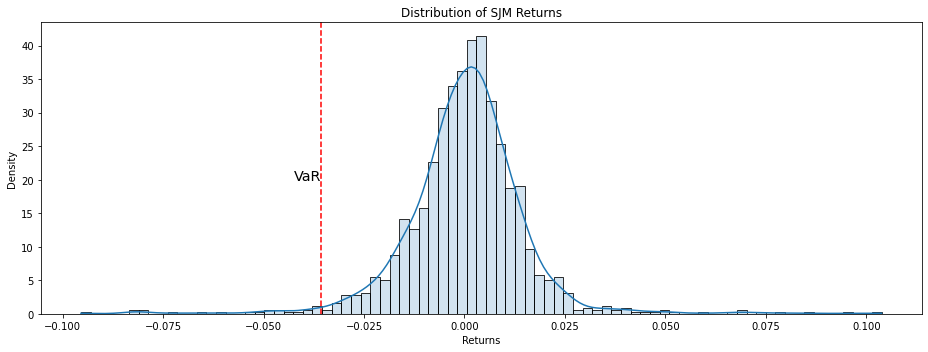

In [20]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['SJM'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of SJM Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

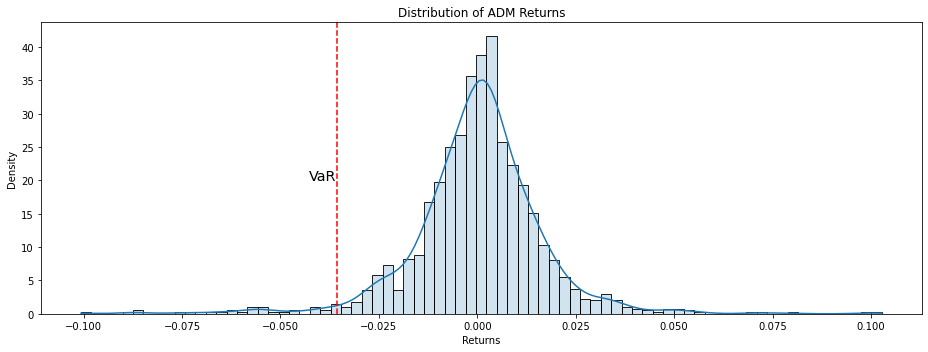

In [21]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['ADM'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of ADM Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

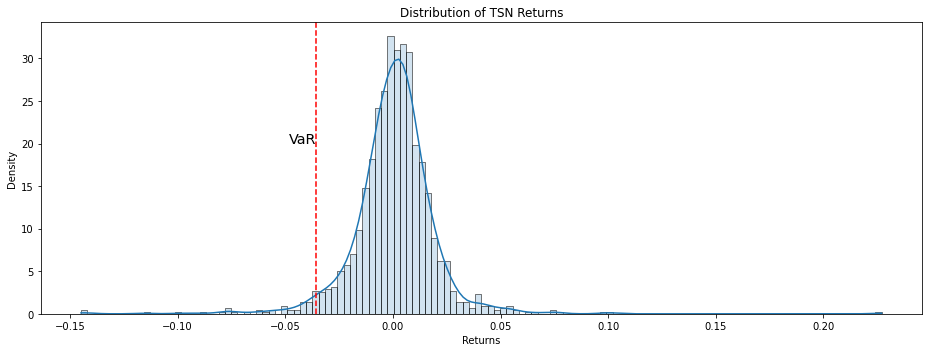

In [22]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['TSN'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of TSN Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

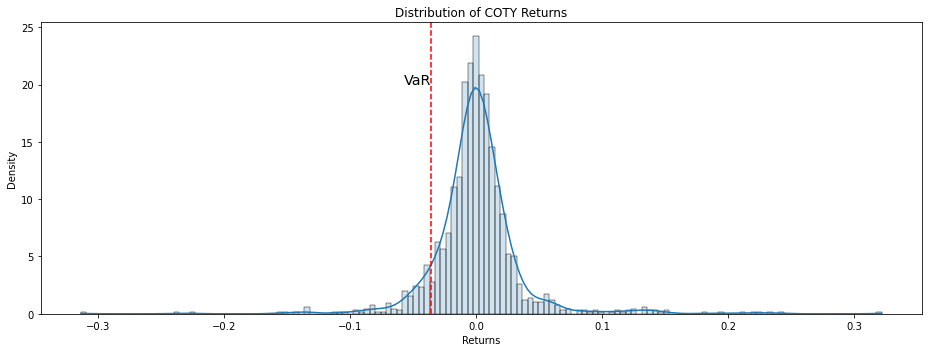

In [23]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['COTY'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of COTY Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

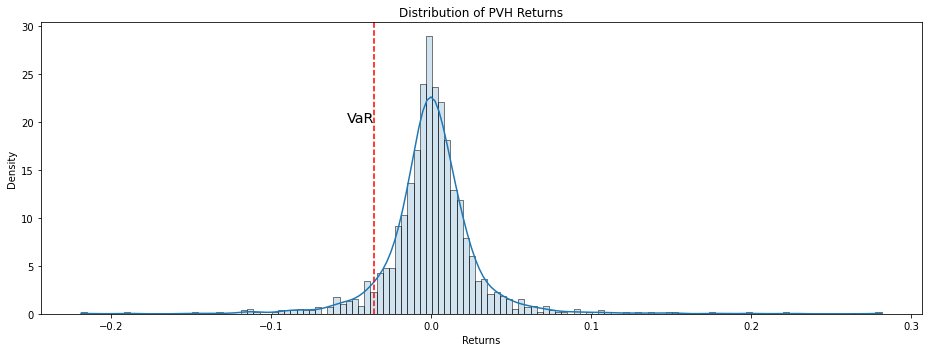

In [24]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['PVH'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of PVH Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

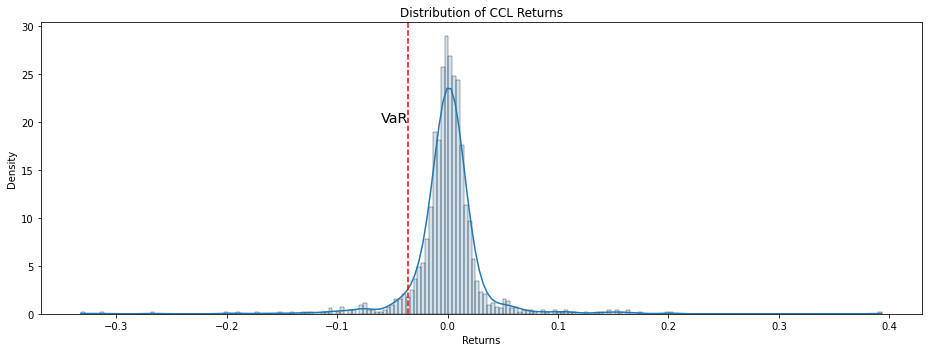

In [25]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['CCL'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of CCL Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

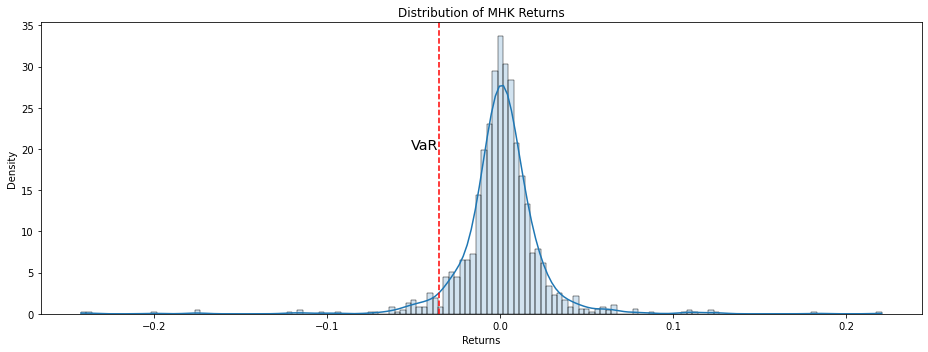

In [26]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['MHK'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of MHK Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

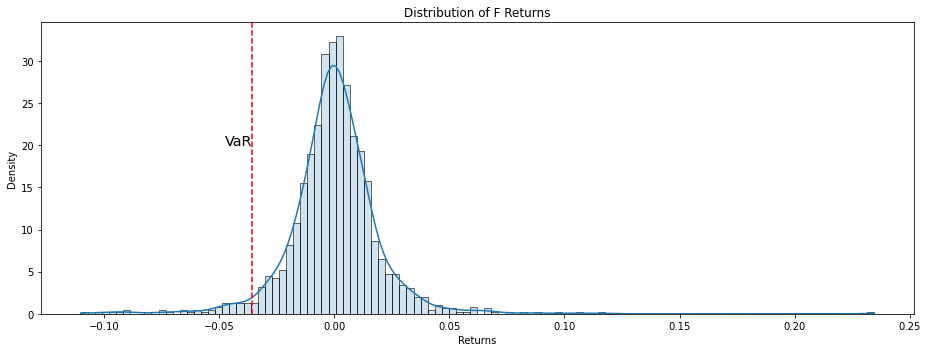

In [27]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['F'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of F Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

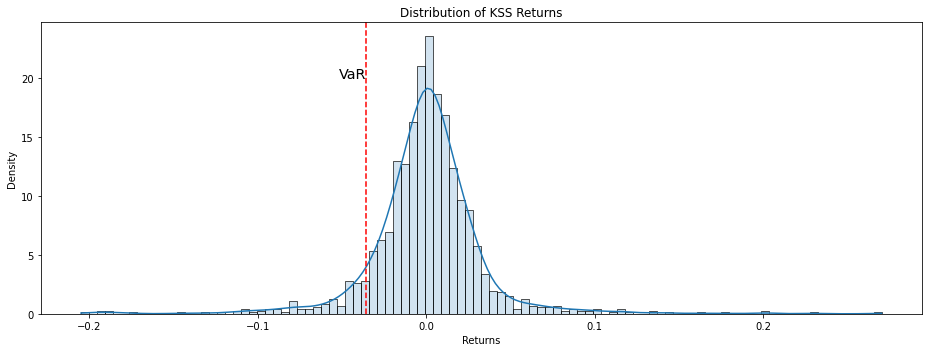

In [28]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['KSS'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of KSS Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

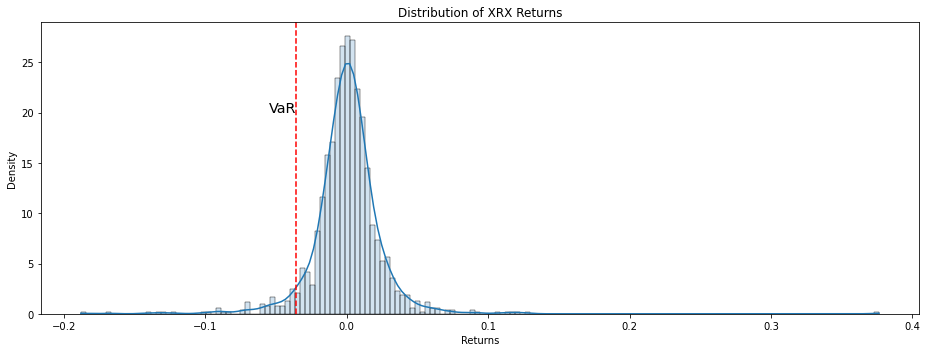

In [29]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['XRX'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of XRX Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

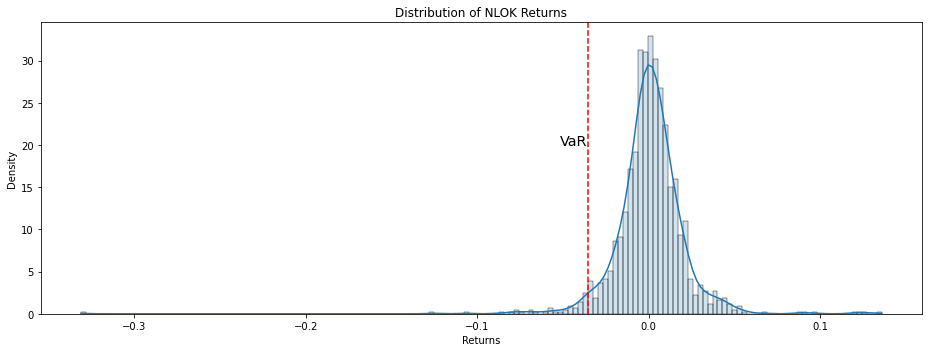

In [30]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['NLOK'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of NLOK Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

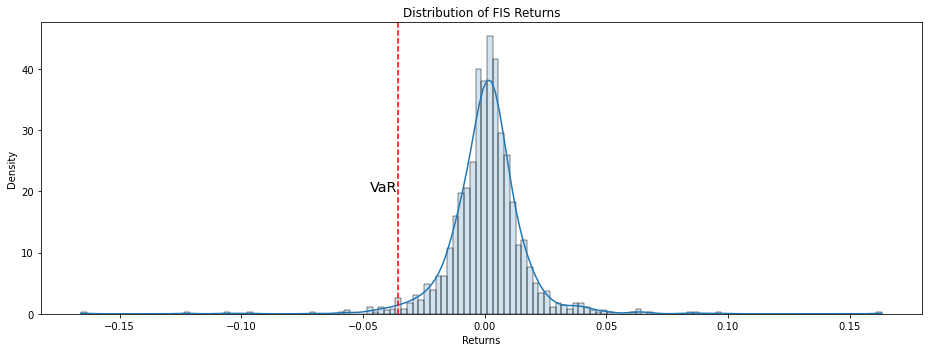

In [31]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['FIS'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of FIS Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

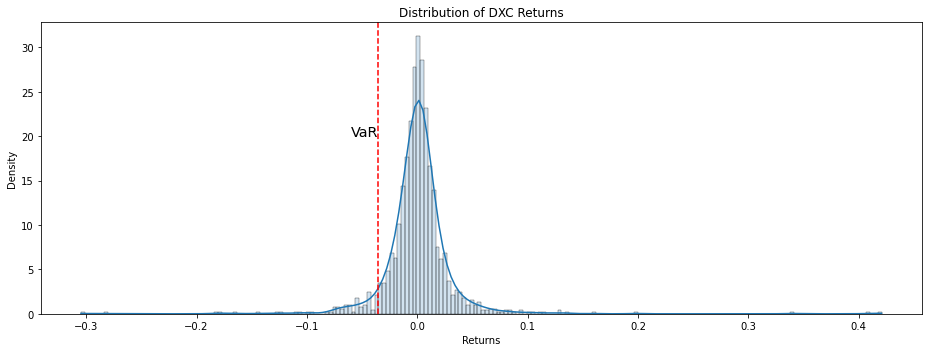

In [32]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['DXC'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of DXC Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

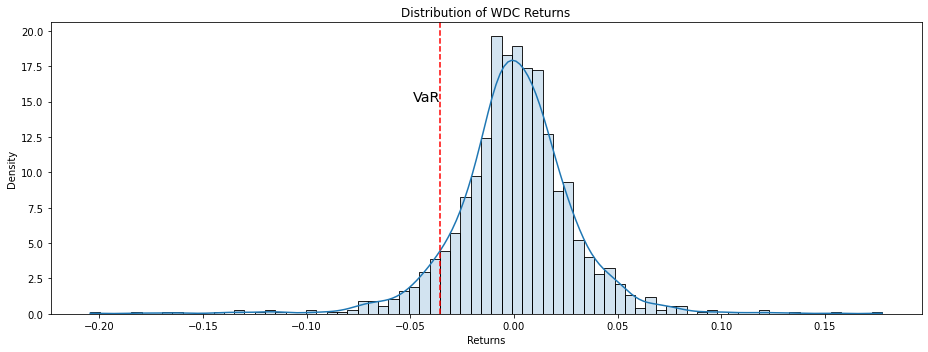

In [43]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['WDC'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of WDC Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         15,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

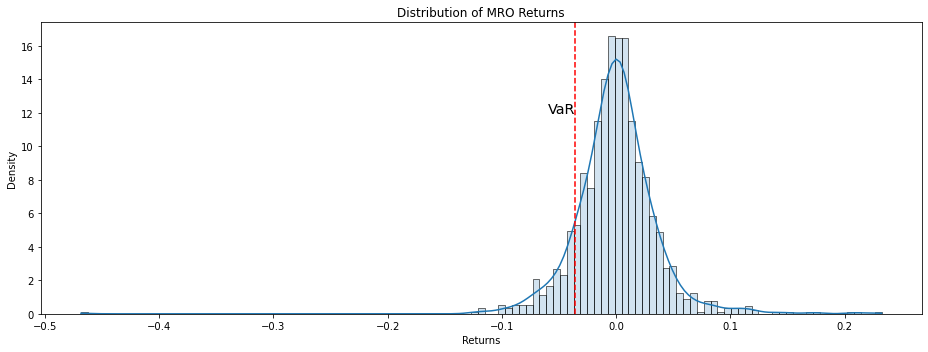

In [42]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['MRO'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of MRO Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         12,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

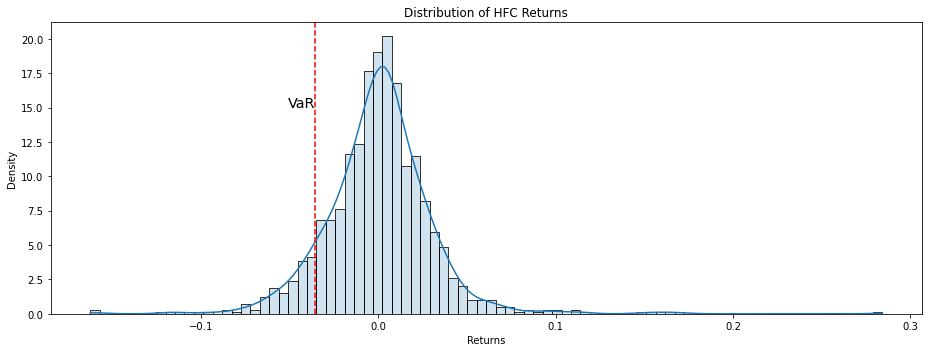

In [41]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['HFC'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of HFC Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         15,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

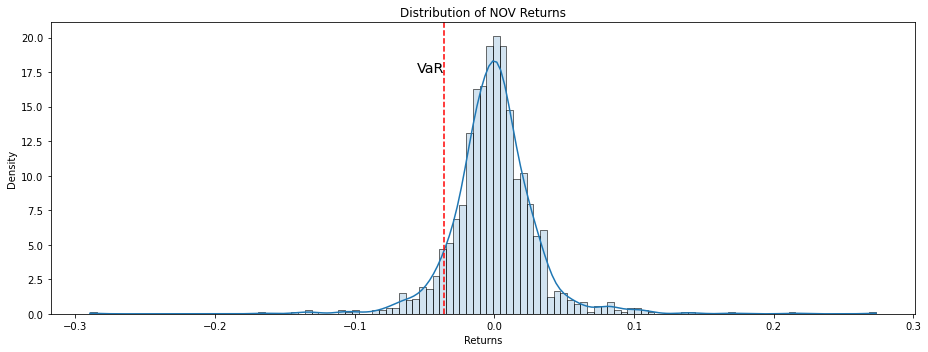

In [40]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['NOV'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of NOV Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         17.5,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

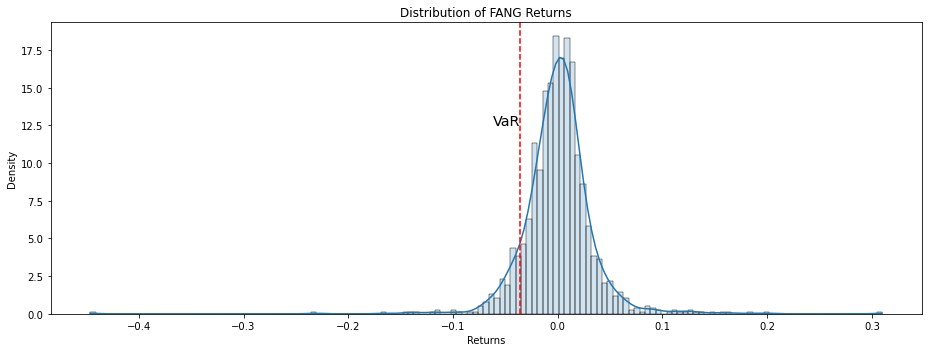

In [39]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['FANG'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of FANG Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         12.5,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

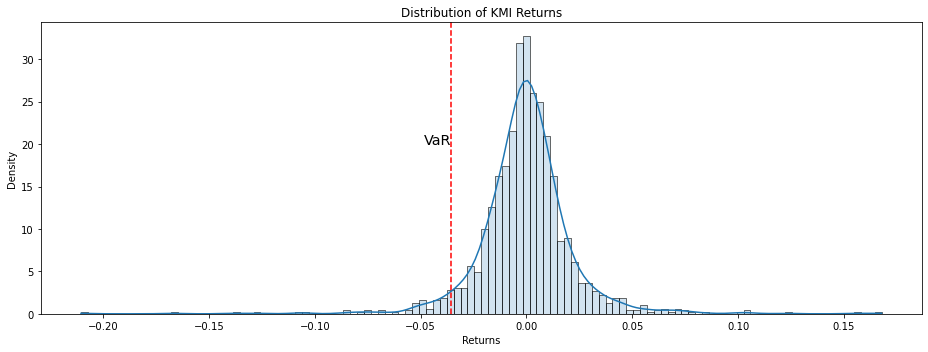

In [38]:
# Plot Returns + VaR

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))

# histogram for returns
sns.histplot(data  = returns['KMI'],  # data set - index Perrigo
             bins  = 'fd',          # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,          # kernel density plot (line graph)
             alpha = 0.2,           # transparency of colors
             stat  = 'density')     # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of KMI Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# instantiate VaR with 95% confidence level
VaR_95 = np.percentile(returns, 5)


# this adds a line to signify VaR
plt.axvline(x         = VaR_95,         # x-axis location
            color     = 'r',            # line color
            linestyle = '--')           # line style


# this adds a label to the line
plt.text(VaR_95,                         # x-axis location
         20,                             # y-axis location
         'VaR',                          # text
         horizontalalignment = 'right',  # alignment ('center' | 'left')
         fontsize = 'x-large')           # fontsize


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

## Fundamentals

In [14]:
# New Packages!

##############################################################################
# Downloading packages
import sys                  # To install packages from your Jupyter Notebook


##############################################################################
# Import packages
import yahoo_fin as yf                   # data scraping library
import yahoo_fin.stock_info as si        # module from library for stock_info

### Single Ticker

In [15]:
# Scrape the table found on the quote page of an input ticker from Yahoo Finance 
quote_table = si.get_quote_table('PRGO', dict_result = False)

quote_table

,attribute,value
0,1y Target Est,56.22
1,52 Week Range,40.01 - 63.86
2,Ask,43.35 x 800
3,Avg. Volume,1.03779e+06
4,Beta (5Y Monthly),1.21
5,Bid,42.92 x 800
6,Day's Range,42.81 - 44.05
7,EPS (TTM),-0.05
8,Earnings Date,"Feb 25, 2021 - Mar 01, 2021"
9,Ex-Dividend Date,"Nov 25, 2020"


In [16]:
# Get PE Ratio
quote_table.iloc[13, 1]

nan

In [17]:
# Get Dividends
quote_table.iloc[10, 1]

'0.90 (2.07%)'

In [18]:
# Scrape Valuation Measures data from statistics page for input ticker
stats_table = si.get_stats_valuation('PRGO')

# Set row index to be the measure for text-based referencing
stats_table.set_index('Unnamed: 0', inplace=True)

stats_table

# Subsetting data for specific values
#stats_table.loc['Enterprise Value 3', 'As of Date: 1/30/2021Current']
#stats_table.iloc[1,0]

,As of Date: 2/6/2021Current,9/30/2020,6/30/2020,3/31/2020,12/31/2019
Unnamed: 0,,,,,
Market Cap (intraday) 5,5.88B,6.27B,7.54B,6.55B,7.03B
Enterprise Value 3,8.59B,8.95B,10.50B,9.57B,10.13B
Trailing P/E,24.33,26.23,40.34,44.94,28.70
Forward P/E 1,10.24,10.63,13.99,12.02,11.74
PEG Ratio (5 yr expected) 1,NaN,NaN,NaN,NaN,NaN
Price/Sales (ttm),1.16,1.24,1.51,1.36,1.50
Price/Book (mrq),1.01,1.06,1.30,1.13,1.22
Enterprise Value/Revenue 3,1.69,7.38,8.62,7.14,7.66
Enterprise Value/EBITDA 6,12.94,2.80k,52.55,40.21,42.70
